In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Se carga el dataset que he limpiado y preparado para el análisis visual
df = pd.read_csv("../data/wines_SPA_cleaned.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   winery                 2048 non-null   object 
 1   wine                   2048 non-null   object 
 2   year                   1976 non-null   float64
 3   rating                 2048 non-null   float64
 4   rating_norm            2048 non-null   float64
 5   price                  2048 non-null   float64
 6   price_group            2048 non-null   object 
 7   region                 2048 non-null   object 
 8   body                   2025 non-null   float64
 9   acidity                2025 non-null   float64
 10  quality_price_percent  2048 non-null   float64
dtypes: float64(7), object(4)
memory usage: 176.1+ KB


In [5]:
# Preguntas a las que se busca responder con visualización:
    # 1. Distribución de la calidad de los vinos españoles
    # 2. Cantidad de vinos por año de cosecha y región
    # 3. Distribución de los precios de los vinos españoles
    # 4. Regiones con la mejor calidad-precio de vinos
    # 5. Factores que influyen en la percepción de la calidad-precio por parte de los clientes

# 1. Distribución de la calidad de los vinos españoles

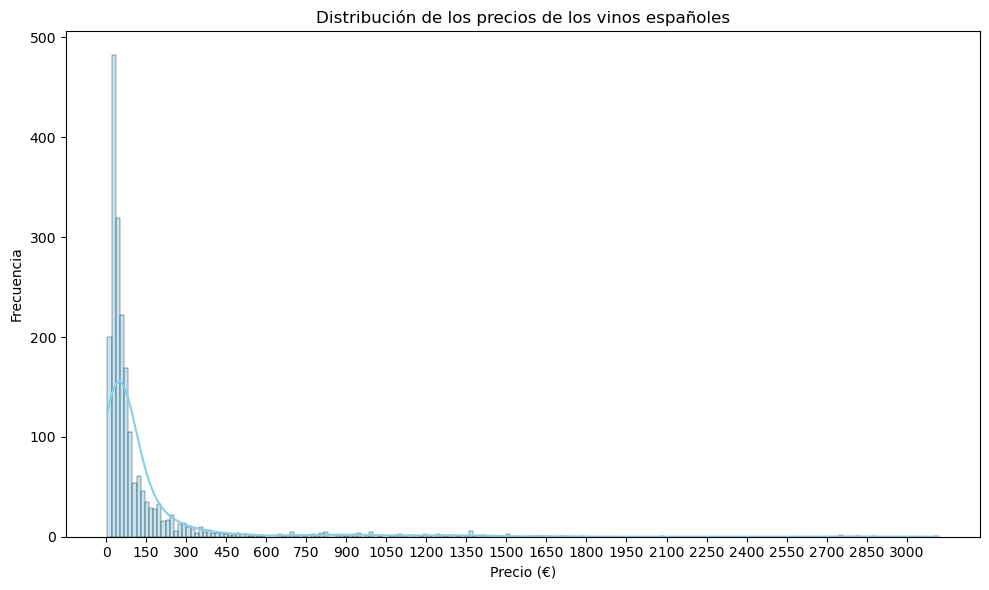

In [ ]:
# Histograma de la calidad de los vinos españoles

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=200, kde=True, color="skyblue")
plt.title("Distribución de los precios de los vinos españoles")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0, max(df['price']), 150))
plt.tight_layout()
plt.show()

In [22]:
# Se observa que la mayoría de los vinos del mercado están concentrados en precios bajos y medios
# Se ve claramente cómo la oferta de vinos disminuye a medida que aumenta el precio, seguramente por preferencias del mercado
# Se puede intuir que al rededor de los 350 euros, el producto se torna un artículo de lujo


# 2. Cantidad de productores de vino por región

C:\Users\Ismael\AppData\Local\Temp\ipykernel_13536\2158729310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=winery_por_region.index, x=winery_por_region.values, palette='Set2', orient='h')


C:\Users\Ismael\AppData\Local\Temp\ipykernel_13536\2158729310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=winery_por_region.index, x=winery_por_region.values, palette='Set2', orient='h')


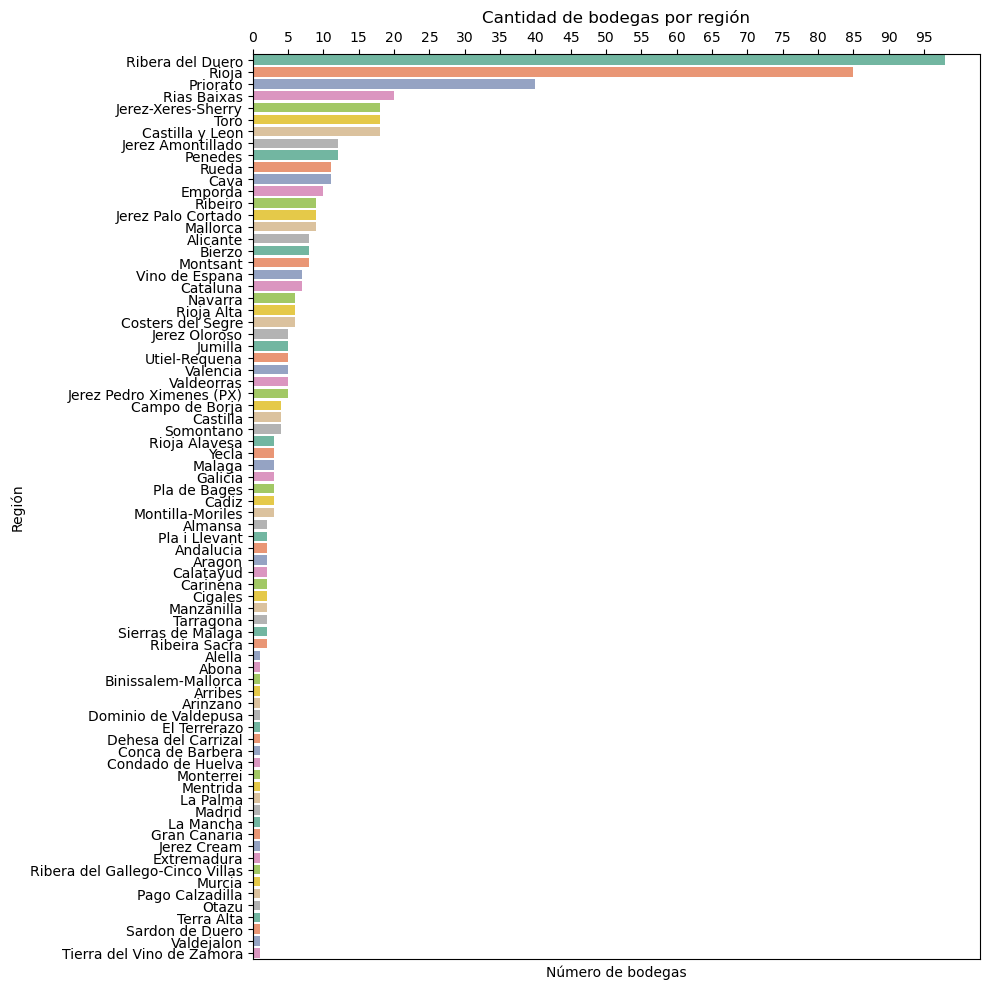

In [8]:
# Diagrama de barras de la cantidad de bodegas (winery) por región

winery_por_region = df.groupby("region")["winery"].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(y=winery_por_region.index, x=winery_por_region.values, palette='Set2', orient='h')
plt.title("Cantidad de bodegas por región")
plt.ylabel("Región")
plt.xlabel("Número de bodegas")
plt.gca().xaxis.tick_top()
plt.xticks(np.arange(0, 100, 5))
plt.tight_layout()
plt.show()

In [9]:
# El gran grueso de vinos españoles proviene de unas pocas regiones, siendo Ribera del Duero y La Rioja las más destacadas

# 3. Distribución de los precios de los vinos españoles

#### Boxplot para el grupo de precios "low" - de 0 a 50 €

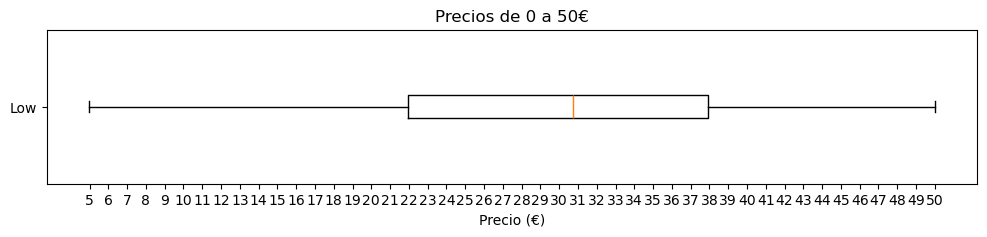

In [10]:
# Boxplot horizontal para grupo "low"

low_prices = df[df["price_group"] == "low"]["price"]
plt.figure(figsize=(12, 2))
plt.boxplot(low_prices, vert=False)
plt.title("Precios de 0 a 50€")
plt.xlabel("Precio (€)")
min_tick = 5
max_price = int(low_prices.max())
plt.xticks(np.arange(min_tick, max_price+1, 1))
plt.yticks([1], ["Low"])
plt.show()

In [11]:
# Conclusión para los vinos con precio entre 0 y 50 euros:
    # Todos los vinos tienen precios concentrados entre los 22 y 38€
    # La mayoría de los vinos están cerca de los 31€

#### Boxplot para el grupo de precios "mid" - entre 50 y 1000€

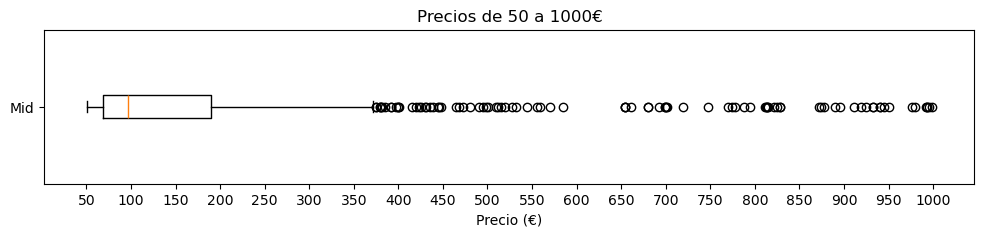

In [12]:
# Boxplot horizontal para grupo "mid"

mid_prices = df[df["price_group"] == "mid"]["price"]
plt.figure(figsize=(12, 2))
plt.boxplot(mid_prices, vert=False)
plt.title("Precios de 50 a 1000€")
plt.xlabel("Precio (€)")
min_price = int(mid_prices.min())
max_price = int(mid_prices.max())
plt.xticks(np.arange(min_price, max_price+50, 50))
plt.yticks([1], ["Mid"])
plt.show()

In [13]:
# Conclusión para los vinos con un precio entre 50 y 1000 euros:
    # El grueso de los vinos de este grupo están concentrados entre los 70 y 190€
    # La mayoría de los vinos están cerca de los 100€
    # En el outlier superior se puede destacar que entre los 370€ y los 1000€ hay bastantes vinos, mayormente entre los 370 y los 450€

#### Boxplot para el grupo de precios "high" - más de 1000€

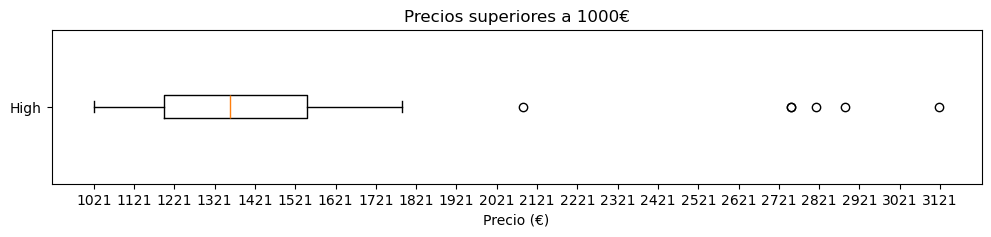

In [14]:
# Boxplot horizontal para grupo "high"

high_prices = df[df["price_group"] == "high"]["price"]
plt.figure(figsize=(12, 2))
plt.boxplot(high_prices, vert=False)
plt.title("Precios superiores a 1000€")
plt.xlabel("Precio (€)")
min_price = int(high_prices.min())
max_price = int(high_prices.max())
plt.xticks(np.arange(min_price, max_price+100, 100))
plt.yticks([1], ["High"])
plt.show()

In [15]:
# Conclusión para los vinos con un precio superior a 1000 euros:
    # El grueso de los vinos de este grupo están alrededor de los 1200 y los 1550€
    # La mayoría de los vinos están cerca de los 1360€
    # En el outlier superior hay muy pocos vinos, desde los 2100 hasta los 3121€

#### Boxplot para el total de precios de los vinos españoles

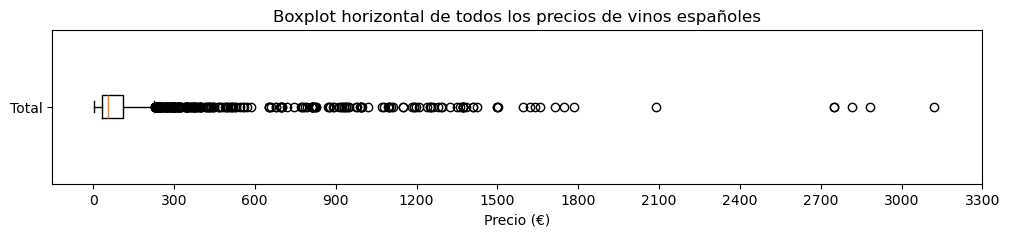

In [16]:
# Boxplot horizontal para todos los precios

all_prices = df["price"]
plt.figure(figsize=(12, 2))
plt.boxplot(all_prices, vert=False)
plt.title("Boxplot horizontal de todos los precios de vinos españoles")
plt.xlabel("Precio (€)")
min_tick = 0
max_price = int(all_prices.max())
plt.xticks(np.arange(min_tick, max_price+300, 300))
plt.yticks([1], ["Total"])
plt.show()

### Conclusión para el total de precios de los vinos españoles:
- El mercado español tiene una gran variedad de precios, pero la mayor parte de la oferta se concentra en rangos de precio asequibles o de un precio moderado, con la mediana situada cerca de los vinos con precios bajos.
- Los vinos que se salen fuera del grueso del mercado se concentran en torno a unos precios de 200 a 400 euros, reduciéndose exponencialmente el número de vinos ofertados a medida que crece el precio.
- El grueso del mercado está orientado a consumidores que buscan unos precios asequibles, lo que sugiere que las estrategias comerciales deben priorizar ofertar vinos dentro de esos rangos.
- Se pueden apreciar las zonas de dispersión en los segmentos más altos, lo que puede permitir saber qué precios oscilan los vinos más premium del mercado para tenerlo en cuenta a la hora de tener una reserva de vinos premium.

# 4. Regiones con la mejor calidad/precio de vinos
- Identificar las regiones que ofrecen los vinos más valorados
- Comprobar la opinión general de los usuarios en base a la media de precios de cada región

#### Heatmap para visualizar la calidad/precio de cada región

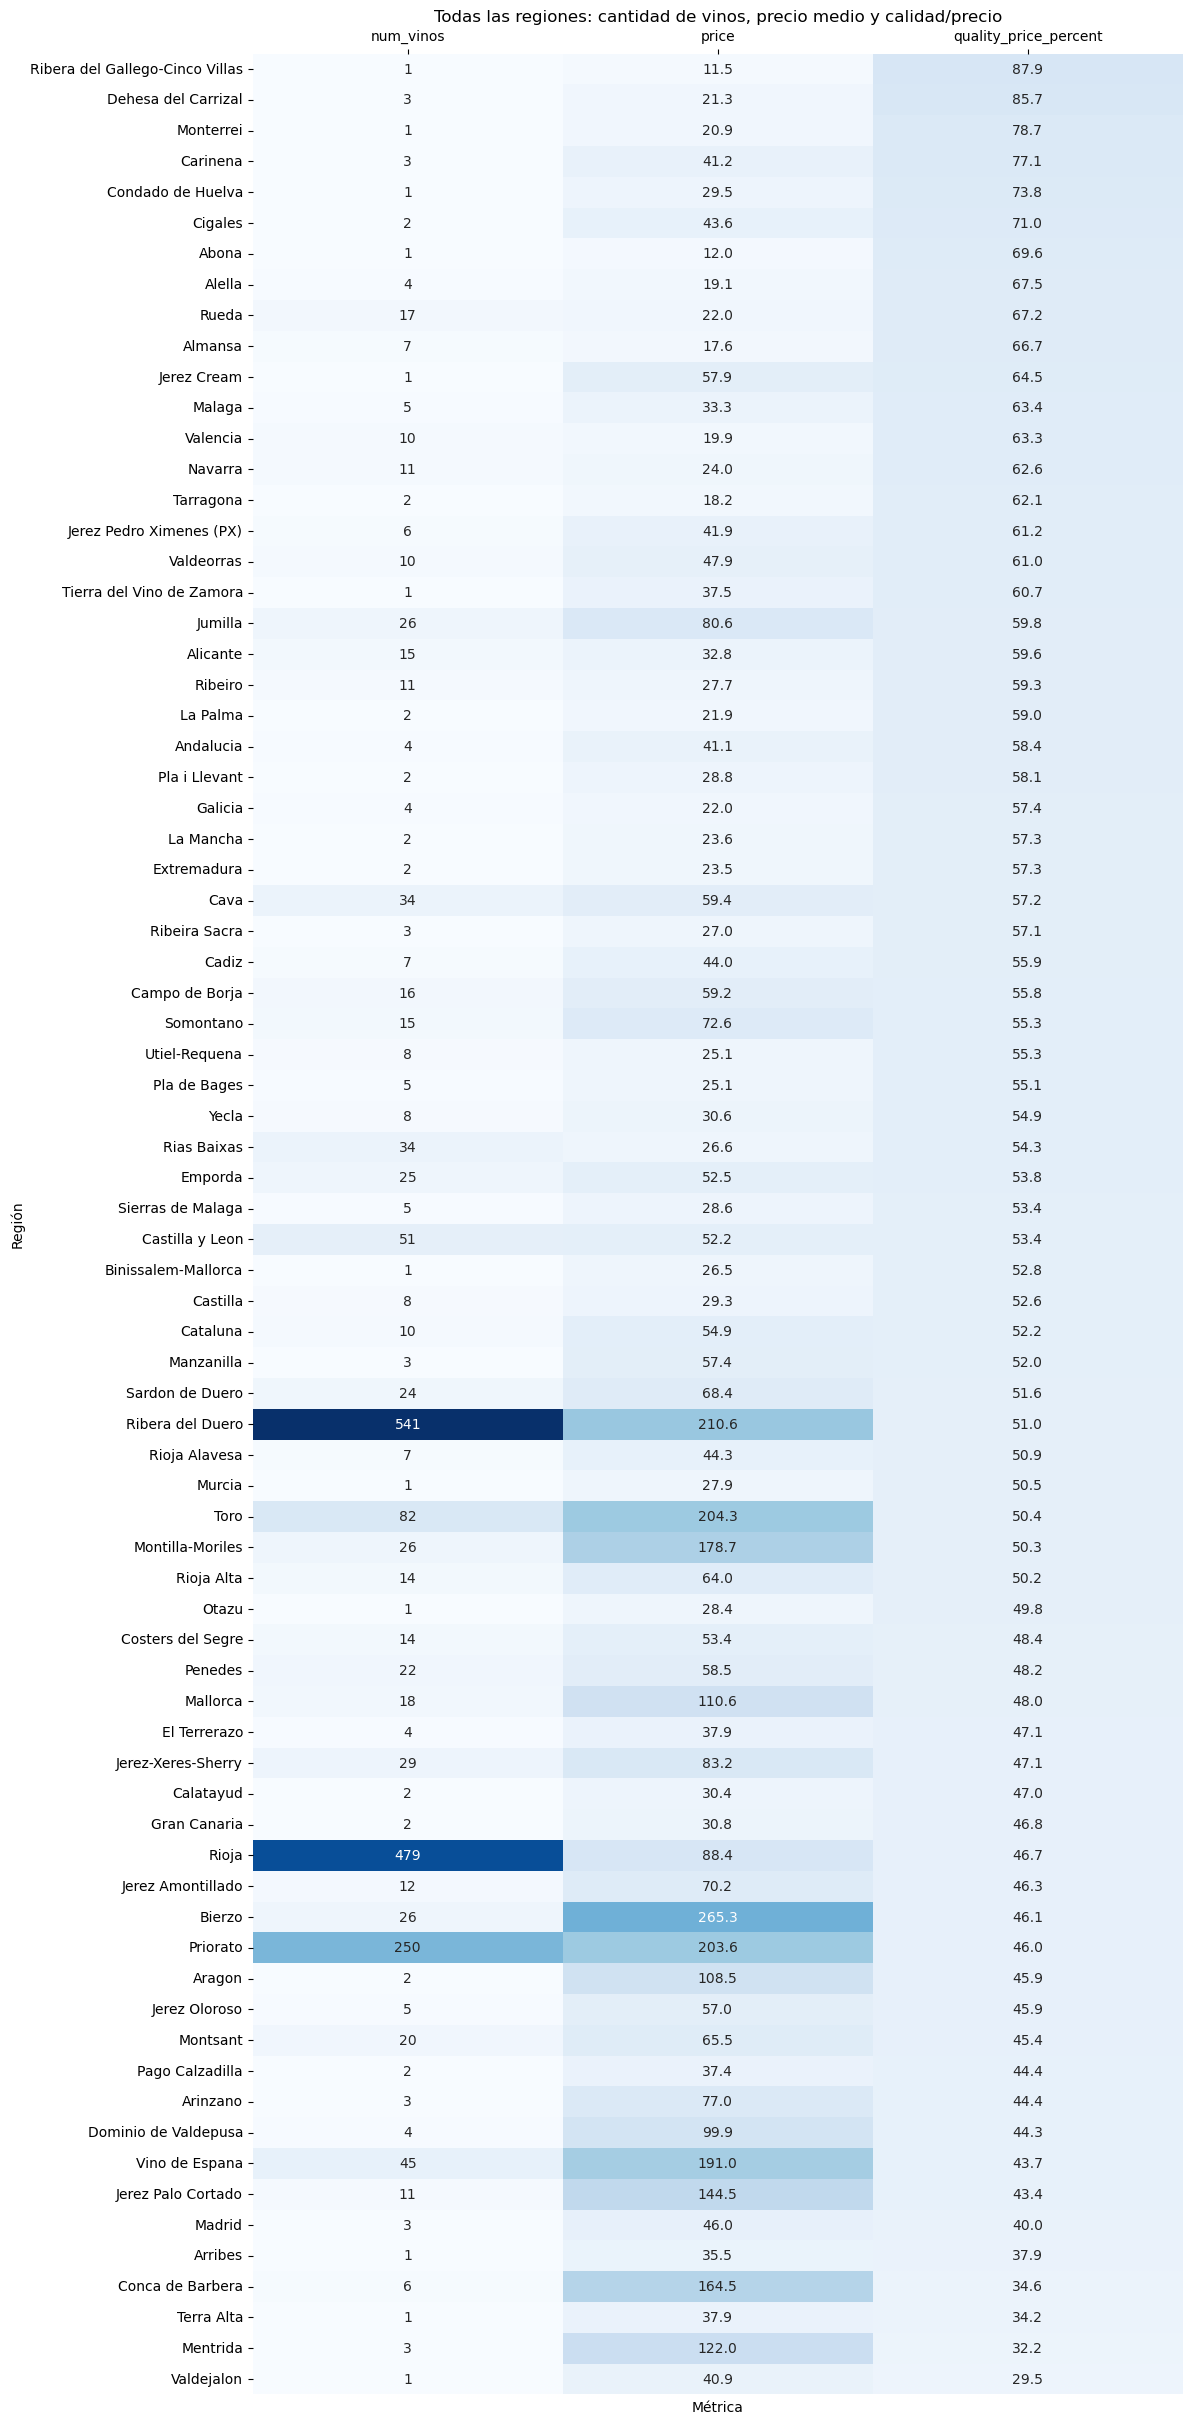

In [17]:
# Calcular métricas por región para todos los vinos
pivot_all = df.groupby("region").agg({
    "quality_price_percent": "mean",
    "price": "mean",
    "region": "count"
}).rename(columns={"region": "num_vinos"})

# Ordenar por calidad/precio descendente
pivot_all = pivot_all.sort_values("quality_price_percent", ascending=False)

# Reordenar columnas: num_vinos, price, quality_price_percent
cols = ["num_vinos", "price", "quality_price_percent"]

# Preparar matriz de anotaciones con formato personalizado
annotations_all = pivot_all[cols].copy()
annotations_all["num_vinos"] = annotations_all["num_vinos"].astype(int)
for col in ["price", "quality_price_percent"]:
    annotations_all[col] = annotations_all[col].map('{:.1f}'.format)

plt.figure(figsize=(12, max(4, len(pivot_all)*0.4)))
ax = sns.heatmap(pivot_all[cols], annot=annotations_all.values, fmt='', cmap='Blues', cbar=False)
plt.title("Todas las regiones: cantidad de vinos, precio medio y calidad/precio")
plt.ylabel("Región")
ax.xaxis.tick_top()
plt.xlabel("Métrica")
plt.show()

#### Heatmap que muestra únicamente las regiones que ofertan más de 10 vinos distintos

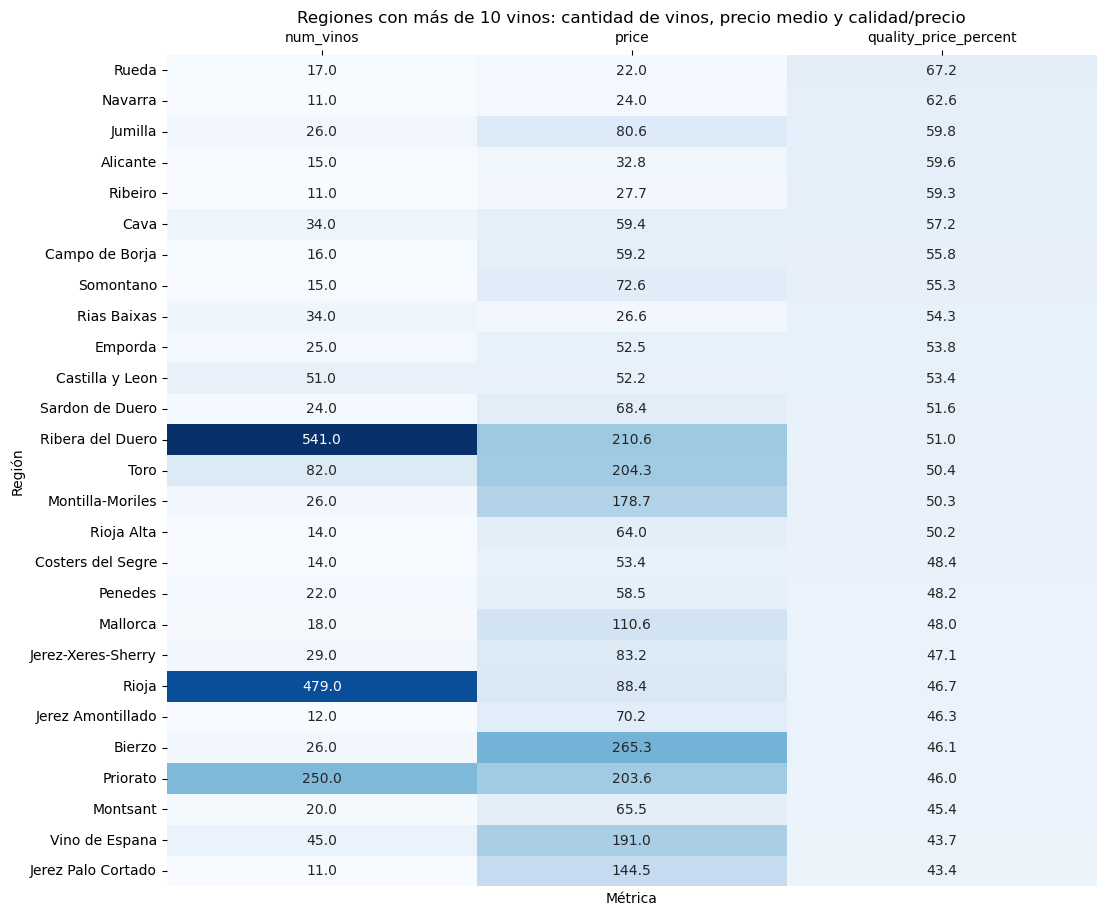

In [18]:
# Filtrar regiones con más de 10 vinos
region_counts = df["region"].value_counts()
selected_regions = region_counts[region_counts > 10].index
df_filtered = df[df["region"].isin(selected_regions)]

# Calcular métricas por región
pivot = df_filtered.groupby("region").agg({
    "quality_price_percent": "mean",
    "price": "mean",
    "region": "count"
}).rename(columns={"region": "num_vinos"})

# Ordenar por calidad/precio descendente
pivot = pivot.sort_values("quality_price_percent", ascending=False)

# Reordenar columnas: num_vinos, price, quality_price_percent
cols = ["num_vinos", "price", "quality_price_percent"]

plt.figure(figsize=(12, max(4, len(pivot)*0.4)))
ax = sns.heatmap(pivot[cols], annot=True, fmt='.1f', cmap='Blues', cbar=False)
plt.title("Regiones con más de 10 vinos: cantidad de vinos, precio medio y calidad/precio")
plt.ylabel("Región")
ax.xaxis.tick_top()
plt.xlabel("Métrica")
plt.show()

### Conclusión para la relación calidad/precio por región:
- Antes de dar una conclusión, hay que tener en cuenta que la calidad/precio está basado en notas medias de usuarios en distintas webs, además, las notas mínimas eran desde 4.2 hasta 4.9, en ningún caso una menor calidad/precio refleja que el vino sea malo, simplemente refleja la preferencia de los usuarios.
- En una lectura general de todas las regiones se puede deducir que los vinos con mayor calidad/precio por lo general son vinos con un precio bajo, lo que indica que el consumidor español valora especialmente el equilibrio entre un bajo coste y la satisfacción.
- Al filtrar por regiones con más de 10 vinos, se mantiene la disposicion observada en el conjunto total de las regiones, lo que refuerza la visión de que el usuario valora mejos los vinos de menor precio.
- Las regiones con precios medios elevados no destacan en calidad/precio, estando sobre todo en posiciones medias de la tabla o inferiores, podría entenderse que el usuario espera un producto de mucha más calidad de la que obtendría por un vino con un precio mucho menor y por tanto tiende a darle una menor puntuación.
- A nivel comercial, se podrían trazar estrategias de pedido a los vinos con mayor calidad/precio dentro de las regiones más valorada o con una opinión por encima de la media para tener más oportunidad de mercado a la vez que se pueden ahorrar costos en transporte. Esto nos ayuda a mejorar la rentabilidad y la competitivdad.

# 5. Factores que influyen en la percepción de la calidad-precio por parte de los clientes
- Se miden los factores de precio, añada, cuerpo y acidez en base a la calidad/precio 

#### Lineplot de calidad-precio por rangos de precio de 100€ 

C:\Users\Ismael\AppData\Local\Temp\ipykernel_13536\3056941449.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_calidad_precio = df.groupby("rango")["quality_price_percent"].mean()


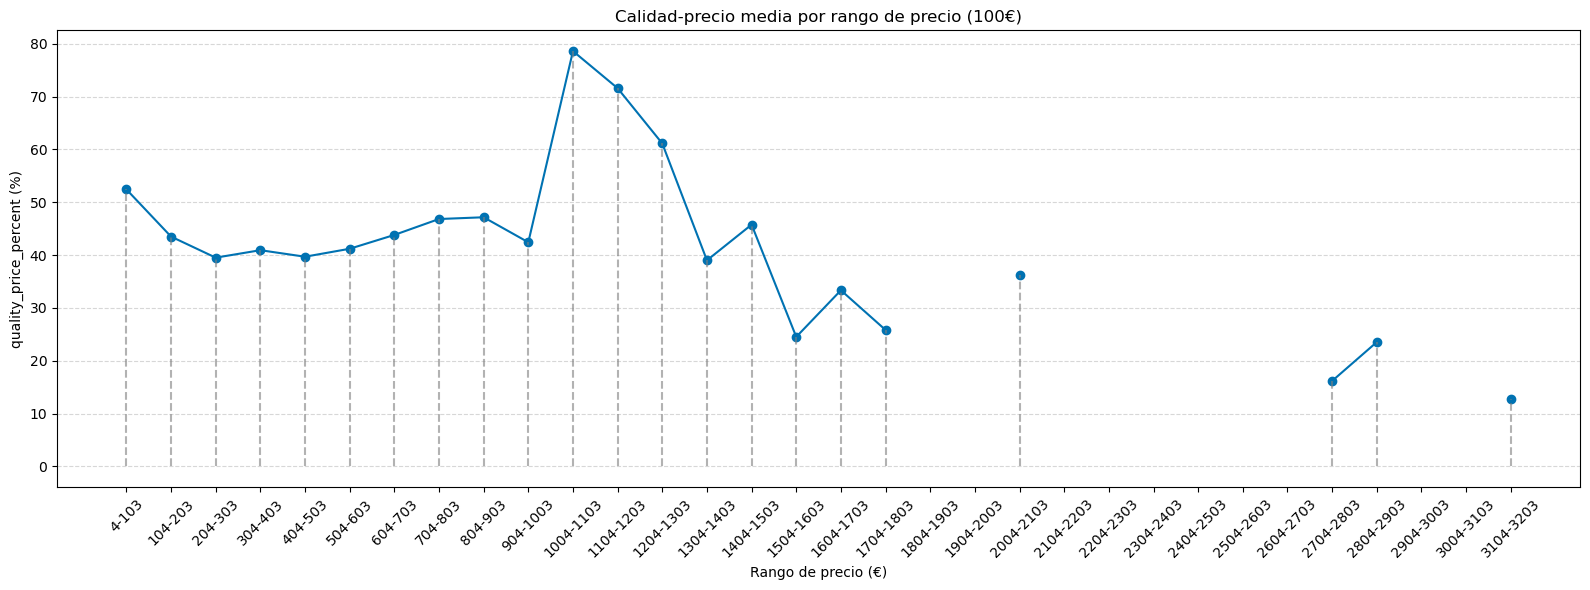

In [19]:
# Definir el tamaño de los rangos de precio
rango_precio = 100

# Calcular los límites mínimo y máximo de precio
precio_min = int(df["price"].min())
precio_max = int(df["price"].max())

# Crear los intervalos de precio
intervalos = list(range(precio_min, precio_max + rango_precio + 1, rango_precio))

# Agrupar los vinos en rangos de precio
df["rango"] = pd.cut(df["price"], bins=intervalos, right=False)

# Calcular la media de calidad-precio por rango
media_calidad_precio = df.groupby("rango")["quality_price_percent"].mean()

# Preparar etiquetas para el eje X
etiquetas = [f"{int(r.left)}-{int(r.right-1)}" for r in media_calidad_precio.index]

# Crear el gráfico
plt.figure(figsize=(16, 6))
x = range(len(etiquetas))
y = media_calidad_precio.values
plt.plot(x, y, marker="o", color="#0072B2")
for i, valor in enumerate(y):
    plt.vlines(x[i], 0, valor, linestyles='dashed', color='gray', alpha=0.6)
plt.xlabel("Rango de precio (€)")
plt.ylabel("quality_price_percent (%)")
plt.title("Calidad-precio media por rango de precio (100€)")
plt.xticks(ticks=x, labels=etiquetas, rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Lineplot de calidad-precio por rangos de año

C:\Users\Ismael\AppData\Local\Temp\ipykernel_13536\176706652.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_calidad_precio_year = df.groupby("rango_year")["quality_price_percent"].mean()


C:\Users\Ismael\AppData\Local\Temp\ipykernel_13536\176706652.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_calidad_precio_year = df.groupby("rango_year")["quality_price_percent"].mean()


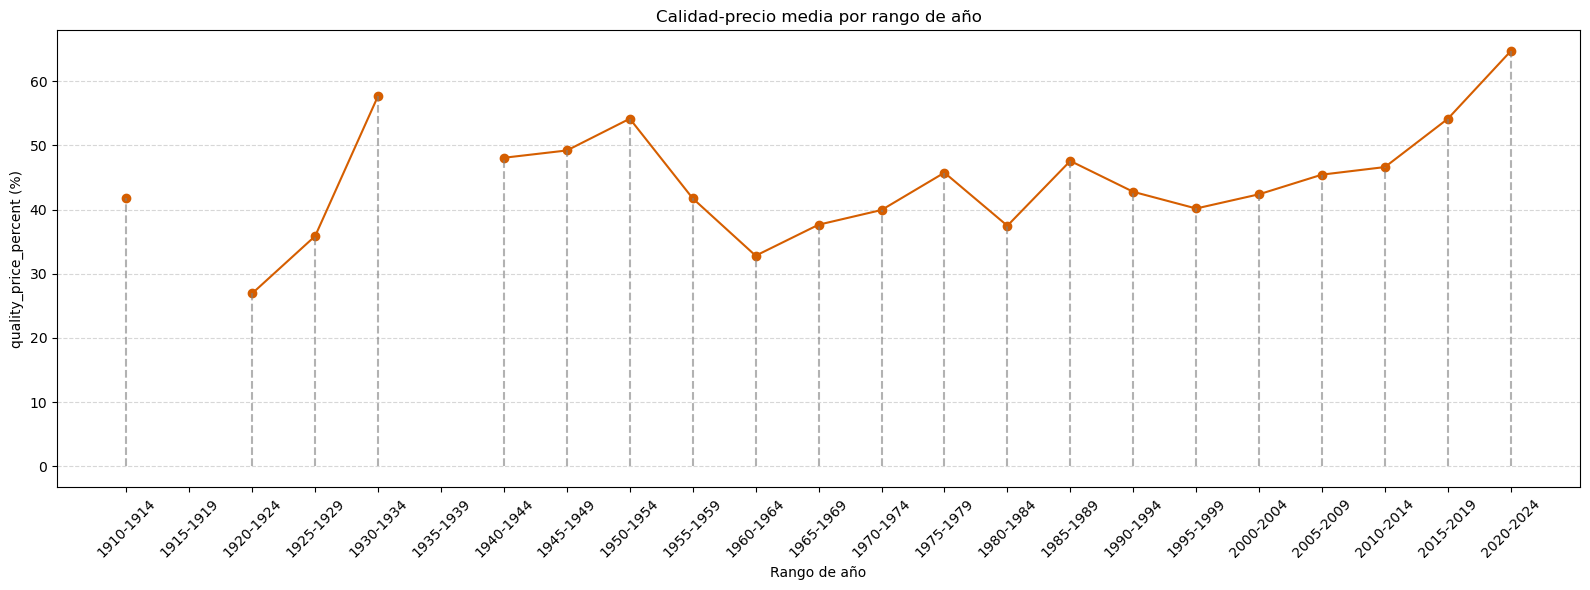

In [20]:
# Definir el tamaño de los rangos de año
rango_year = 5  # Puedes ajustar el tamaño del rango según la dispersión de los años

# Calcular los límites mínimo y máximo de año
year_min = int(df["year"].min())
year_max = int(df["year"].max())

# Crear los intervalos de año
intervalos_year = list(range(year_min, year_max + rango_year + 1, rango_year))

# Agrupar los vinos en rangos de año
df["rango_year"] = pd.cut(df["year"], bins=intervalos_year, right=False)

# Calcular la media de calidad-precio por rango de año
media_calidad_precio_year = df.groupby("rango_year")["quality_price_percent"].mean()

# Preparar etiquetas para el eje X
etiquetas_year = [f"{int(r.left)}-{int(r.right-1)}" for r in media_calidad_precio_year.index]

# Crear el gráfico
plt.figure(figsize=(16, 6))
x = range(len(etiquetas_year))
y = media_calidad_precio_year.values
plt.plot(x, y, marker="o", color="#D55E00")
for i, valor in enumerate(y):
    plt.vlines(x[i], 0, valor, linestyles='dashed', color='gray', alpha=0.6)
plt.xlabel("Rango de año")
plt.ylabel("quality_price_percent (%)")
plt.title("Calidad-precio media por rango de año")
plt.xticks(ticks=x, labels=etiquetas_year, rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Lineplot de calidad-precio por rangos de body y acidity

C:\Users\Ismael\AppData\Local\Temp\ipykernel_13536\3090526078.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_body = df.groupby("rango_body")["quality_price_percent"].mean()
C:\Users\Ismael\AppData\Local\Temp\ipykernel_13536\3090526078.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_acidity = df.groupby("rango_acidity")["quality_price_percent"].mean()


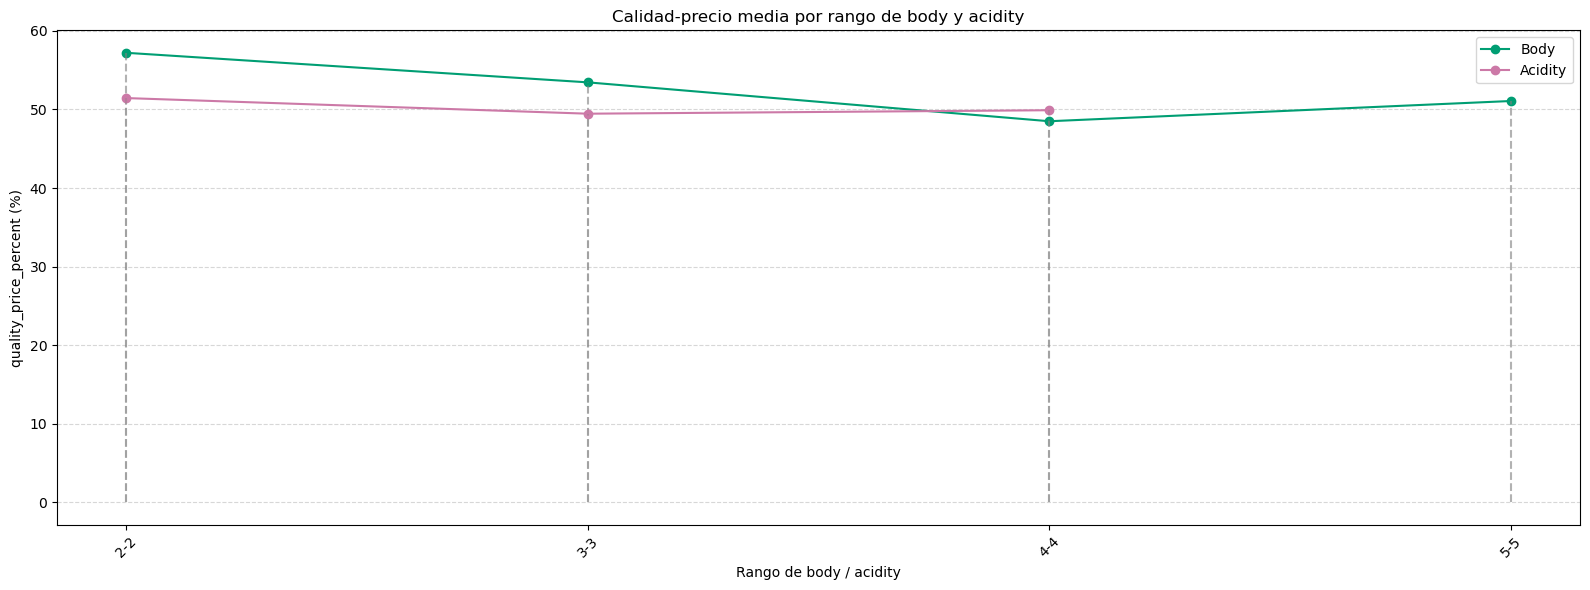

In [22]:
# Tamaño de los rangos
rango_body = 1
rango_acidity = 1

# Calcular los límites mínimo y máximo
body_min = int(df["body"].min())
body_max = int(df["body"].max())
acidity_min = int(df["acidity"].min())
acidity_max = int(df["acidity"].max())

# Crear los intervalos
intervalos_body = list(range(body_min, body_max + rango_body + 1, rango_body))
intervalos_acidity = list(range(acidity_min, acidity_max + rango_acidity + 1, rango_acidity))

# Agrupar los vinos en rangos
df["rango_body"] = pd.cut(df["body"], bins=intervalos_body, right=False)
df["rango_acidity"] = pd.cut(df["acidity"], bins=intervalos_acidity, right=False)

# Calcular la media de calidad-precio por rango
media_body = df.groupby("rango_body")["quality_price_percent"].mean()
media_acidity = df.groupby("rango_acidity")["quality_price_percent"].mean()

etiquetas_body = [f"{int(r.left)}-{int(r.right-1)}" for r in media_body.index]
etiquetas_acidity = [f"{int(r.left)}-{int(r.right-1)}" for r in media_acidity.index]

plt.figure(figsize=(16, 6))
x_body = range(len(etiquetas_body))
y_body = media_body.values
x_acidity = range(len(etiquetas_acidity))
y_acidity = media_acidity.values
plt.plot(x_body, y_body, marker="o", color="#009E73", label="Body")
for i, valor in enumerate(y_body):
    plt.vlines(x_body[i], 0, valor, linestyles="dashed", color="gray", alpha=0.6)
plt.plot(x_acidity, y_acidity, marker="o", color="#CC79A7", label="Acidity")
for i, valor in enumerate(y_acidity):
    plt.vlines(x_acidity[i], 0, valor, linestyles="dashed", color="gray", alpha=0.3)
plt.xlabel("Rango de body / acidity")
plt.ylabel("quality_price_percent (%)")
plt.title("Calidad-precio media por rango de body y acidity")
plt.xticks(ticks=x_body, labels=etiquetas_body, rotation=45)
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Conclusión de los factores que influyen en la percepción de la calidad/precio de los usuarios
- En base a la distribución de precios, la mayoría de los vinos sabemos que se concentran en el rango hasta los 100€, y en general este rango supera la media de calidad/precio preferente de los consumidores, y en vinos de rangos de precios superiores se puede observar que los vinos de un precio de 1000 a 1100 euros son los que lideran la opinión de los usuarios, mientras que en los vinos más caros se puede ver perfectamente cómo a más precio tienen los rangos de vino, más decae la opinión del usuario.
- En base al año del vino, los más valorados son claramente los vinos de 2020 a 2024, mientras que la añada con peor opinión es la de 1920 a 1924.
- En base a su cuerpo y acidez, deja claro que los usuarios prefieren con creces vinos con poco cuerpo y poca acidez, aunque la acidez se mantiene estable en cuestión de preferencia y puede ser menos relevante para los usuarios, el cuerpo queda claro que los usuarios valoran menos un vino con cuerpo de valor 4.
- En conclusión, a la hora de elegir qué vinos escoger para adecuarnos a las preferencias del mercado, está claro que hay que usar estos factores para predecir qué vinos serían los preferidos o los más valorados por la gente, y por tanto aumentar la calidad y la competitividad.